In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('Table_Optimal2015-08-15.csv')

In [3]:
df[df['$t$']==99]['ExpValue']

1     5378.180176
2     5675.519531
3     5234.361816
4     4929.801270
5     5231.047363
6     4704.916992
7     5675.375977
8     4556.161621
9     5675.061523
10    5227.161621
Name: ExpValue, dtype: float64

In [4]:
print df.dtypes

$c^{1}$       int64
$c^{2}$       int64
$c^{3}$       int64
$c^{4}$       int64
$c^{5}$       int64
$y^{1}$       int64
$y^{2}$       int64
$y^{3}$       int64
$y^{4}$       int64
$y^{5}$       int64
$t$           int64
ExpValue    float64
$d_{0}$       int64
$d_{1}$       int64
$d_{2}$       int64
$d_{3}$       int64
$d_{4}$       int64
$d_{5}$       int64
dtype: object


In [5]:
df_Series2 = pd.DataFrame(index=['$d_{0}$', '%%%%%'], columns=range(6))

for j in df.groupby('$d_{0}$').size().index:
    df_Series2[j]['$d_{0}$'] = df.groupby('$d_{0}$').size()[j]
for j in df.groupby('$d_{0}$').size().index:    
    df_Series2[j]['%%%%%'] = np.around((df_Series2[j]['$d_{0}$']/df_Series2.sum(axis=1)['$d_{0}$'])*100, 2)

print df_Series2.to_latex()

\begin{tabular}{lllllll}
\toprule
{} &      0 &     1 &     2 &     3 &     4 &    5 \\
\midrule
\$d\_\{0\}\$ &  58893 &  1461 &  4800 &  6788 &  3661 &  NaN \\
\%\%\%\%\%   &   77.9 &  1.93 &  6.35 &  8.98 &  4.84 &  NaN \\
\bottomrule
\end{tabular}



In [6]:
df_Series = pd.DataFrame(index=df.dtypes[13:].index, columns=[0, 1,  2, 3])

for i in df.dtypes[13:].index:
    for j in df.groupby(i).size().index:
        df_Series[j][i] = df.groupby(i).size()[j]
    
for i in range(4):
    df_Series[str(i)+'%'] = pd.Series((df_Series[i]/df_Series.sum(axis=1))*100)
    for j in df_Series.index:
        df_Series[str(i)+'%'][j] = np.around(df_Series[str(i)+'%'][j], 2)
    
df_Series = df_Series.reindex_axis([0, '0%', 1, '1%', 2, '2%', 3, '3%'], axis=1)

print df_Series.to_latex()

\begin{tabular}{lllllllll}
\toprule
{} &      0 &     0\% &      1 &     1\% &      2 &     2\% &     3 &    3\% \\
\midrule
\$d\_\{1\}\$ &  73378 &  97.06 &    764 &   1.01 &    NaN &    NaN &  1461 &  1.93 \\
\$d\_\{2\}\$ &  59771 &  79.06 &   1639 &   2.17 &  11337 &  14.98 &  2856 &  3.77 \\
\$d\_\{3\}\$ &  44058 &  58.28 &   3349 &   4.43 &  24818 &   32.8 &  3378 &  4.46 \\
\$d\_\{4\}\$ &  29200 &  38.62 &   7845 &  10.37 &  37475 &  49.54 &  1083 &  1.43 \\
\$d\_\{5\}\$ &  13013 &  17.21 &  29056 &  38.42 &  33534 &  44.32 &   NaN &   NaN \\
\bottomrule
\end{tabular}



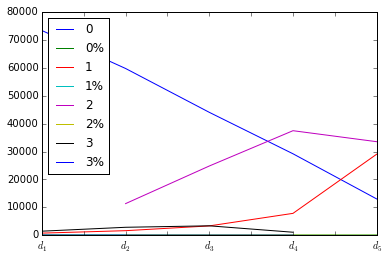

In [7]:
#plt.title("Verkauf der optimalen Politik")
#plt.ylabel("p[j](t)")
#plt.xlabel("t")
plt.figure()
df_Series.plot();